## Systematic error is demonstrated by using Binomial random variables

/mnt/TGT/DatavisVENV_V2/lib/python3.8/site-packages/scipy/stats/_discrete_distns.py:69: RuntimeWarning: divide by zero encountered in _binom_pdf
  return _boost._binom_pdf(x, n, p)


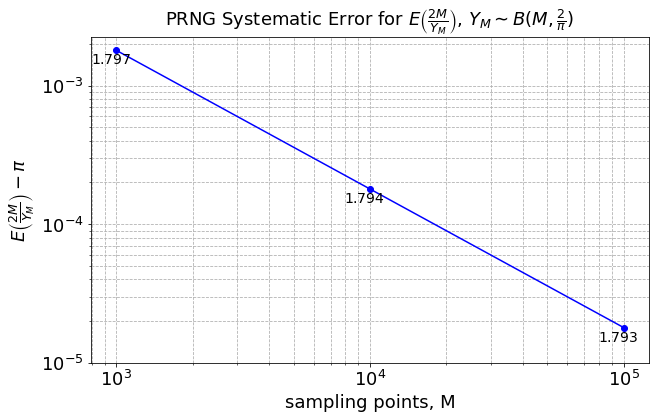

1.9520355319671836
[0.001797061356741736, 0.00017935936940238761, 1.7932479519977562e-05]


In [1]:
from scipy.stats import binom
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

def format_sci(n):
    a = '{:.3e}'.format(n)
    base, exponent = a.split('e')
    exponent = int(exponent)  
    if exponent == 0:
        return r'${}$'.format(base)  
    else:
        return r'${}$'.format(base, exponent)


power_list = [3, 4, 5]
p = 2 / np.pi
sys_err = []
x_values = []

for a in power_list:
    n = 10 ** a
    y_values = np.arange(1, n + 1)
    probabilities = binom.pmf(y_values, n, p)

    # Compute E[2n/Y_n]
    E_2n_Yn = np.sum((2 * n / y_values) * probabilities)

    sys_err.append(E_2n_Yn - np.pi)
    x_values.append(n)

plt.figure(figsize=(10, 6))
plt.plot(x_values, sys_err, marker='o', linestyle='-', color='b')

sys_err_str = ', '.join(["{:.3e}".format(err) for err in sys_err])

# Creating the xlabel_text by concatenating the LaTeX expression with the sys_err_str
xlabel_text = r'$E\left(\Pi_n\right) -\pi$ = [' + sys_err_str + ']'
plt.title(r'PRNG Systematic Error for $E\left(\frac{2M}{Y_M}\right)$, $Y_M \sim B(M, \frac{2}{\pi})$', fontsize=18)

plt.xlabel('sampling points, M', fontsize=18)
plt.ylabel(r'$E\left(\frac{2M}{Y_M}\right) -\pi$', fontsize=18)
plt.xscale('log')

plt.yscale('log')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.grid(True, which="both", ls="--")

formatted_labels = [format_sci(err) for err in sys_err]

for idx, err in enumerate(sys_err):
    plt.text(x_values[idx]*(1-0.05), sys_err[idx]*(1-0.2), formatted_labels[idx], fontsize=14, ha='center')

yticks = [1e-3, 1e-4, 1e-5]
ytick_labels = [r'$10^{-3}$', r'$10^{-4}$', r'$10^{-5}$']
plt.yticks(yticks, ytick_labels)

plt.savefig('systematic_error_3.png', dpi=150)

plt.show()

alpha = 0.05
z_score = stats.norm.ppf(1 - alpha)
sys_err_predicted  = np.pi*np.sqrt(np.pi/2-1)/2*z_score
print(sys_err_predicted)


print(sys_err)